In [1]:
# DSC 680
# Final Project 2
# Aaron Kuethe

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
# Load data into a dataframe.

data = pd.read_csv("all_seasons.csv")
data.head()
# The data from the NBA dataset csv has been loaded in.

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [3]:
# Add new variables of Points, Rebounds, Assists, Weighted Net Rating, Weighted OREB PCT, Weighted DREB PCT, Weighted USG PCT,
# Weighted TS PCT, and Weighted AST PCT
# I foresee the need to summariez a player's career versus looking at individual seasons, therefore I will need weighted
# average as opposed to just the average stats that are provided by the dataset

data['Total_Points'] = data['pts']*data['gp']
data['Total_Rebounds'] = data['reb']*data['gp']
data['Total_Assists'] = data['ast']*data['gp']
data['Weighted_NET_Rating'] = data['net_rating']*data['gp']
data['Weighted_OREB_PCT'] = data['oreb_pct']*data['gp']
data['Weighted_DREB_PCT'] = data['dreb_pct']*data['gp']
data['Weighted_USG_PCT'] = data['usg_pct']*data['gp']
data['Weighted_TS_PCT'] = data['ts_pct']*data['gp']
data['Weighted_AST_PCT'] = data['ast_pct']*data['gp']

data.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,season,Total_Points,Total_Rebounds,Total_Assists,Weighted_NET_Rating,Weighted_OREB_PCT,Weighted_DREB_PCT,Weighted_USG_PCT,Weighted_TS_PCT,Weighted_AST_PCT
0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,1996-97,313.5,885.5,170.5,885.5,10.230,17.765,5.500,26.345,6.215
1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,...,1996-97,34.5,22.5,4.5,184.5,1.170,2.265,2.625,6.450,0.720
2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1996-97,7.2,9.0,3.6,-18.9,0.945,0.918,0.927,3.384,1.332
3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,...,1996-97,236.8,147.2,38.4,-556.8,3.840,9.536,10.688,25.536,4.928
4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,...,1996-97,64.8,64.8,5.4,-302.4,2.943,4.833,3.429,16.497,1.080


In [4]:
# Viewing the data types of all variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 30 columns):
player_name            12305 non-null object
team_abbreviation      12305 non-null object
age                    12305 non-null int64
player_height          12305 non-null float64
player_weight          12305 non-null float64
college                12305 non-null object
country                12305 non-null object
draft_year             12305 non-null object
draft_round            12305 non-null object
draft_number           12305 non-null object
gp                     12305 non-null int64
pts                    12305 non-null float64
reb                    12305 non-null float64
ast                    12305 non-null float64
net_rating             12305 non-null float64
oreb_pct               12305 non-null float64
dreb_pct               12305 non-null float64
usg_pct                12305 non-null float64
ts_pct                 12305 non-null float64
ast_pct                12305

In [5]:
# Examining the numerical variables in the dataset

data.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,...,ast_pct,Total_Points,Total_Rebounds,Total_Assists,Weighted_NET_Rating,Weighted_OREB_PCT,Weighted_DREB_PCT,Weighted_USG_PCT,Weighted_TS_PCT,Weighted_AST_PCT
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,...,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,...,0.131358,500.010679,211.901325,110.411540,-35.155295,2.775993,7.338528,9.679834,27.166579,7.055088
std,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,...,0.094483,465.699407,194.709493,130.858148,341.539059,2.535197,4.868310,5.729102,14.237997,6.438198
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1458.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,...,0.066000,113.400000,58.000000,19.000000,-236.300000,0.901000,3.720000,5.070000,15.283000,2.387000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,...,0.103000,378.000000,164.000000,65.000000,-46.200000,1.890000,6.713000,9.664000,30.037000,5.270000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,...,0.178000,762.600000,306.000000,151.800000,150.000000,4.002000,10.153000,13.760000,39.347000,9.652000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,...,1.000000,2832.000000,1248.000000,934.800000,1530.900000,15.006000,31.200000,33.048000,59.450000,43.983000


In [6]:
# Verifying that no null value exist

data.isnull().sum()

player_name            0
team_abbreviation      0
age                    0
player_height          0
player_weight          0
college                0
country                0
draft_year             0
draft_round            0
draft_number           0
gp                     0
pts                    0
reb                    0
ast                    0
net_rating             0
oreb_pct               0
dreb_pct               0
usg_pct                0
ts_pct                 0
ast_pct                0
season                 0
Total_Points           0
Total_Rebounds         0
Total_Assists          0
Weighted_NET_Rating    0
Weighted_OREB_PCT      0
Weighted_DREB_PCT      0
Weighted_USG_PCT       0
Weighted_TS_PCT        0
Weighted_AST_PCT       0
dtype: int64

In [7]:
# Adding a column that counts how many NBA seasons every player played in

data['Player-Season'] = data['player_name']+'-'+data['season']
data['Seasons'] = data.groupby(['Player-Season']).cumcount()+1
data.fillna(0)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,Total_Rebounds,Total_Assists,Weighted_NET_Rating,Weighted_OREB_PCT,Weighted_DREB_PCT,Weighted_USG_PCT,Weighted_TS_PCT,Weighted_AST_PCT,Player-Season,Seasons
0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,885.5,170.5,885.5,10.230,17.765,5.500,26.345,6.215,Dennis Rodman-1996-97,1
1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,...,22.5,4.5,184.5,1.170,2.265,2.625,6.450,0.720,Dwayne Schintzius-1996-97,1
2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,9.0,3.6,-18.9,0.945,0.918,0.927,3.384,1.332,Earl Cureton-1996-97,1
3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,...,147.2,38.4,-556.8,3.840,9.536,10.688,25.536,4.928,Ed O'Bannon-1996-97,1
4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,...,64.8,5.4,-302.4,2.943,4.833,3.429,16.497,1.080,Ed Pinckney-1996-97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Markieff Morris,MIA,32,205.74,111.130040,Kansas,USA,2011,1,13,...,44.2,23.8,76.5,1.003,1.513,3.349,9.299,1.972,Markieff Morris-2021-22,1
12301,Markelle Fultz,ORL,24,193.04,94.800728,Washington,USA,2017,1,1,...,48.6,99.0,-95.4,0.180,2.088,4.770,9.306,8.064,Markelle Fultz-2021-22,1
12302,Marcus Smart,BOS,28,193.04,99.790240,Oklahoma State,USA,2014,1,6,...,269.8,418.9,660.3,1.278,6.603,12.709,38.340,17.395,Marcus Smart-2021-22,1
12303,Marcus Garrett,MIA,23,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,Undrafted,...,22.8,7.2,69.6,0.864,1.296,1.032,3.360,0.828,Marcus Garrett-2021-22,1


In [8]:
# Creating a new data frame that summarizes each player's career stats

player_summary = pd.DataFrame(data.groupby(['player_name','college','country','draft_year','draft_round','draft_number'], as_index=False)[('player_height','player_weight','gp','Total_Points','Total_Rebounds','Total_Assists','Weighted_NET_Rating','Weighted_OREB_PCT','Weighted_DREB_PCT','Weighted_USG_PCT','Weighted_TS_PCT','Weighted_AST_PCT','Seasons')].sum())
player_summary

,player_name,college,country,draft_year,draft_round,draft_number,player_height,player_weight,gp,Total_Points,Total_Rebounds,Total_Assists,Weighted_NET_Rating,Weighted_OREB_PCT,Weighted_DREB_PCT,Weighted_USG_PCT,Weighted_TS_PCT,Weighted_AST_PCT,Seasons
0,A.C. Green,Oregon State,USA,1985,1,23,1028.70,510.291000,379,2220.2,2345.3,337.4,-599.6,35.126,70.903,47.617,185.999,20.809,5
1,A.J. Bramlett,Arizona,USA,1999,2,39,208.28,102.965384,8,8.0,22.4,0.0,-260.8,1.264,1.664,1.168,1.520,0.000,1
2,A.J. Guyton,Indiana,USA,2000,2,32,556.26,244.939680,80,441.0,81.3,145.7,-588.0,1.584,4.764,16.086,37.800,18.494,3
3,AJ Hammons,Purdue,USA,2016,2,46,213.36,117.933920,22,48.4,35.2,4.4,-13.2,1.078,4.378,3.674,10.384,0.836,1
4,AJ Price,Connecticut,USA,2009,2,52,1127.76,508.930224,261,1521.7,377.6,570.4,-335.1,4.711,23.709,54.283,125.771,64.107,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,Zoran Dragic,None,Slovenia,Undrafted,Undrafted,Undrafted,195.58,90.718400,16,28.8,8.0,4.8,-244.8,1.152,0.720,3.472,6.960,1.856,1
2578,Zoran Planinic,None,Croatia,2003,1,22,601.98,269.887240,148,557.3,195.5,162.0,-919.0,5.224,17.583,31.118,72.270,31.405,3
2579,Zydrunas Ilgauskas,None,Lithuania,1996,1,20,2872.74,1533.140960,843,10981.9,6189.0,967.1,2180.1,105.034,160.002,194.236,448.899,60.633,13
2580,Zylan Cheatham,Arizona St.,USA,Undrafted,Undrafted,Undrafted,195.58,99.790240,1,0.0,0.0,0.0,-106.8,0.000,0.000,0.250,0.000,0.000,1


In [9]:
# Creating several fields to caluclate career averages for each player as opposed to season averages

player_summary['Avg_Weight'] = round(player_summary['player_weight']/player_summary['Seasons'],2)
player_summary['Avg_Height'] = round(player_summary['player_height']/player_summary['Seasons'],2)
player_summary['Avg GP per Season'] = round(player_summary['gp']/player_summary['Seasons'],2)
player_summary['Career_PPG'] = round(player_summary['Total_Points']/player_summary['gp'],2)
player_summary['Career_RPG'] = round(player_summary['Total_Rebounds']/player_summary['gp'],2)
player_summary['Career_APG'] = round(player_summary['Total_Assists']/player_summary['gp'],2)
player_summary['Avg_NET_Rating_per_Season'] = round(player_summary['Weighted_NET_Rating']/player_summary['gp'],2)
player_summary['Avg_OREB_PCT'] = round(player_summary['Weighted_OREB_PCT']/player_summary['gp'],2)
player_summary['Avg_DREB_PCT'] = round(player_summary['Weighted_DREB_PCT']/player_summary['gp'],2)
player_summary['Avg_USG_PCT'] = round(player_summary['Weighted_USG_PCT']/player_summary['gp'],2)
player_summary['Avg_TS_PCT'] = round(player_summary['Weighted_TS_PCT']/player_summary['gp'],2)
player_summary['Avg_AST_PCT'] = round(player_summary['Weighted_AST_PCT']/player_summary['gp'],2)

player_summary

,player_name,college,country,draft_year,draft_round,draft_number,player_height,player_weight,gp,Total_Points,...,Avg GP per Season,Career_PPG,Career_RPG,Career_APG,Avg_NET_Rating_per_Season,Avg_OREB_PCT,Avg_DREB_PCT,Avg_USG_PCT,Avg_TS_PCT,Avg_AST_PCT
0,A.C. Green,Oregon State,USA,1985,1,23,1028.70,510.291000,379,2220.2,...,75.80,5.86,6.19,0.89,-1.58,0.09,0.19,0.13,0.49,0.05
1,A.J. Bramlett,Arizona,USA,1999,2,39,208.28,102.965384,8,8.0,...,8.00,1.00,2.80,0.00,-32.60,0.16,0.21,0.15,0.19,0.00
2,A.J. Guyton,Indiana,USA,2000,2,32,556.26,244.939680,80,441.0,...,26.67,5.51,1.02,1.82,-7.35,0.02,0.06,0.20,0.47,0.23
3,AJ Hammons,Purdue,USA,2016,2,46,213.36,117.933920,22,48.4,...,22.00,2.20,1.60,0.20,-0.60,0.05,0.20,0.17,0.47,0.04
4,AJ Price,Connecticut,USA,2009,2,52,1127.76,508.930224,261,1521.7,...,43.50,5.83,1.45,2.19,-1.28,0.02,0.09,0.21,0.48,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,Zoran Dragic,None,Slovenia,Undrafted,Undrafted,Undrafted,195.58,90.718400,16,28.8,...,16.00,1.80,0.50,0.30,-15.30,0.07,0.04,0.22,0.44,0.12
2578,Zoran Planinic,None,Croatia,2003,1,22,601.98,269.887240,148,557.3,...,49.33,3.77,1.32,1.09,-6.21,0.04,0.12,0.21,0.49,0.21
2579,Zydrunas Ilgauskas,None,Lithuania,1996,1,20,2872.74,1533.140960,843,10981.9,...,64.85,13.03,7.34,1.15,2.59,0.12,0.19,0.23,0.53,0.07
2580,Zylan Cheatham,Arizona St.,USA,Undrafted,Undrafted,Undrafted,195.58,99.790240,1,0.0,...,1.00,0.00,0.00,0.00,-106.80,0.00,0.00,0.25,0.00,0.00


In [10]:
# Deleting columns that are no longer needed

player_summary.drop(['player_height', 'player_weight','Weighted_NET_Rating','Weighted_OREB_PCT', 'Weighted_DREB_PCT', 'Weighted_USG_PCT','Weighted_TS_PCT', 'Weighted_AST_PCT'], axis=1, inplace=True)
player_summary

,player_name,college,country,draft_year,draft_round,draft_number,gp,Total_Points,Total_Rebounds,Total_Assists,...,Avg GP per Season,Career_PPG,Career_RPG,Career_APG,Avg_NET_Rating_per_Season,Avg_OREB_PCT,Avg_DREB_PCT,Avg_USG_PCT,Avg_TS_PCT,Avg_AST_PCT
0,A.C. Green,Oregon State,USA,1985,1,23,379,2220.2,2345.3,337.4,...,75.80,5.86,6.19,0.89,-1.58,0.09,0.19,0.13,0.49,0.05
1,A.J. Bramlett,Arizona,USA,1999,2,39,8,8.0,22.4,0.0,...,8.00,1.00,2.80,0.00,-32.60,0.16,0.21,0.15,0.19,0.00
2,A.J. Guyton,Indiana,USA,2000,2,32,80,441.0,81.3,145.7,...,26.67,5.51,1.02,1.82,-7.35,0.02,0.06,0.20,0.47,0.23
3,AJ Hammons,Purdue,USA,2016,2,46,22,48.4,35.2,4.4,...,22.00,2.20,1.60,0.20,-0.60,0.05,0.20,0.17,0.47,0.04
4,AJ Price,Connecticut,USA,2009,2,52,261,1521.7,377.6,570.4,...,43.50,5.83,1.45,2.19,-1.28,0.02,0.09,0.21,0.48,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,Zoran Dragic,None,Slovenia,Undrafted,Undrafted,Undrafted,16,28.8,8.0,4.8,...,16.00,1.80,0.50,0.30,-15.30,0.07,0.04,0.22,0.44,0.12
2578,Zoran Planinic,None,Croatia,2003,1,22,148,557.3,195.5,162.0,...,49.33,3.77,1.32,1.09,-6.21,0.04,0.12,0.21,0.49,0.21
2579,Zydrunas Ilgauskas,None,Lithuania,1996,1,20,843,10981.9,6189.0,967.1,...,64.85,13.03,7.34,1.15,2.59,0.12,0.19,0.23,0.53,0.07
2580,Zylan Cheatham,Arizona St.,USA,Undrafted,Undrafted,Undrafted,1,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,-106.80,0.00,0.00,0.25,0.00,0.00


In [11]:
# Adding a column to identify whether every player is from the USA or an International country

player_summary['USA_or_International'] = player_summary['country']
player_summary['USA_or_International_Key'] = player_summary['country']
player_summary

,player_name,college,country,draft_year,draft_round,draft_number,gp,Total_Points,Total_Rebounds,Total_Assists,...,Career_RPG,Career_APG,Avg_NET_Rating_per_Season,Avg_OREB_PCT,Avg_DREB_PCT,Avg_USG_PCT,Avg_TS_PCT,Avg_AST_PCT,USA_or_International,USA_or_International_Key
0,A.C. Green,Oregon State,USA,1985,1,23,379,2220.2,2345.3,337.4,...,6.19,0.89,-1.58,0.09,0.19,0.13,0.49,0.05,USA,USA
1,A.J. Bramlett,Arizona,USA,1999,2,39,8,8.0,22.4,0.0,...,2.80,0.00,-32.60,0.16,0.21,0.15,0.19,0.00,USA,USA
2,A.J. Guyton,Indiana,USA,2000,2,32,80,441.0,81.3,145.7,...,1.02,1.82,-7.35,0.02,0.06,0.20,0.47,0.23,USA,USA
3,AJ Hammons,Purdue,USA,2016,2,46,22,48.4,35.2,4.4,...,1.60,0.20,-0.60,0.05,0.20,0.17,0.47,0.04,USA,USA
4,AJ Price,Connecticut,USA,2009,2,52,261,1521.7,377.6,570.4,...,1.45,2.19,-1.28,0.02,0.09,0.21,0.48,0.25,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,Zoran Dragic,None,Slovenia,Undrafted,Undrafted,Undrafted,16,28.8,8.0,4.8,...,0.50,0.30,-15.30,0.07,0.04,0.22,0.44,0.12,Slovenia,Slovenia
2578,Zoran Planinic,None,Croatia,2003,1,22,148,557.3,195.5,162.0,...,1.32,1.09,-6.21,0.04,0.12,0.21,0.49,0.21,Croatia,Croatia
2579,Zydrunas Ilgauskas,None,Lithuania,1996,1,20,843,10981.9,6189.0,967.1,...,7.34,1.15,2.59,0.12,0.19,0.23,0.53,0.07,Lithuania,Lithuania
2580,Zylan Cheatham,Arizona St.,USA,Undrafted,Undrafted,Undrafted,1,0.0,0.0,0.0,...,0.00,0.00,-106.80,0.00,0.00,0.25,0.00,0.00,USA,USA


In [12]:
# Finding unique countries of players to create a function that classifies them as USA (1) or International (0)

list(player_summary.country.unique())

['USA',
 'Egypt',
 'France',
 'United Kingdom',
 'St. Vincent & Grenadines',
 'Dominican Republic',
 'Serbia',
 'Spain',
 'Ukraine',
 'Russia',
 'Turkey',
 'Brazil',
 'Italy',
 'Argentina',
 'Australia',
 'Canada',
 'Latvia',
 'Croatia',
 'Greece',
 'Lithuania',
 'Ghana',
 'Slovenia',
 'DRC',
 'Democratic Republic of the Congo',
 'Sudan',
 'Senegal',
 'Angola',
 'Bahamas',
 'Japan',
 'Puerto Rico',
 'Poland',
 'Nigeria',
 'Mali',
 'Saint Lucia',
 'Gabon',
 'Congo',
 'Switzerland',
 'Netherlands',
 'Germany',
 'Trinidad and Tobago',
 'South Sudan',
 'Sudan (UK)',
 'Israel',
 'Bosnia and Herzegovina',
 'Mexico',
 'Cabo Verde',
 'Uruguay',
 'Denmark',
 'Panama',
 'Georgia',
 'Venezuela',
 'South Korea',
 'Iran',
 'Finland',
 'Tanzania',
 'Serbia and Montenegro',
 'Colombia',
 'Austria',
 'Czech Republic',
 'Sweden',
 'Jamaica',
 'Cameroon',
 'Great Britain',
 'England',
 'Bosnia & Herzegovina',
 'Guinea',
 'Montenegro',
 'China',
 'Belize',
 'Bosnia',
 'Portugal',
 'Ireland',
 'Macedonia'

In [13]:
# Creating USA or International label

def usa_or_international (USA_or_International):
    country_dict = {
        'USA':'USA',
        'Jamaica':'International',
        'Serbia and Montenegro':'International',
        'Ukraine':'International',
        'Canada':'International',
        'Croatia':'International',
        'Lithuania':'International',
        'Nigeria':'International',
        'Congo':'International',
        'St. Vincent & Grenadines':'International',
        'US Virgin Islands':'USA',
        'France':'International',
        'Slovenia':'International',
        'Dominican Republic':'International',
        'Germany':'International',
        'Georgia':'International',
        'New Zealand':'International',
        'Belize':'International',
        'England':'International',
        'Argentina':'International',
        'U.S. Virgin Islands':'USA',
        'Greece':'International',
        'Senegal':'International',
        'China':'International',
        'Turkey':'International',
        'Finland':'International',
        'Mali':'International',
        'Puerto Rico':'USA',
        'Mexico':'International',
        'Yugoslavia':'International',
        'Serbia':'International',
        'Spain':'International',
        'Venezuela':'International',
        'Haiti':'International',
        'Russia':'International',
        'Ireland':'International',
        'Brazil':'International',
        'Scotland':'International',
        'Poland':'International',
        'Netherlands':'International',
        'Czech Republic':'International',
        'Montenegro':'International',
        'United Kingdom':'International',
        'Democratic Republic of the Congo':'International',
        'Latvia':'International',
        'South Korea':'International',
        'Uruguay':'International',
        'Sudan (UK)':'International',
        'Australia':'International',
        'USSR':'International',
        'Italy':'International',
        'Switzerland':'International',
        'Gabon':'International',
        'Cameroon':'International',
        'Iran':'International',
        'Israel':'International',
        'Sweden':'International',
        'Tanzania':'International',
        'Panama':'International',
        'Bosnia':'International',
        'Great Britain':'International',
        'Macedonia':'International',
        'Bosnia & Herzegovina':'International',
        'Cabo Verde':'International',
        'Tunisia':'International',
        'South Sudan':'International',
        'Bahamas':'International',
        'Ghana':'International',
        'Austria':'International',
        'Bosnia and Herzegovina':'International',
        'Egypt':'International',
        'Japan':'International',
        'Trinidad and Tobago':'International',
        'DRC':'International',
        'Sudan':'International',
        'Angola':'International',
        'Saint Lucia':'International',
        'Republic of the Congo':'International',
        'Guinea':'International',
        'Denmark':'International',
        'Colombia':'International',
        'Portugal':'International'
    }
    try:
        return country_dict[USA_or_International]
    except KeyError:
        return '?'

player_summary['USA_or_International'] = player_summary.USA_or_International.apply(usa_or_international)
player_summary

,player_name,college,country,draft_year,draft_round,draft_number,gp,Total_Points,Total_Rebounds,Total_Assists,...,Career_RPG,Career_APG,Avg_NET_Rating_per_Season,Avg_OREB_PCT,Avg_DREB_PCT,Avg_USG_PCT,Avg_TS_PCT,Avg_AST_PCT,USA_or_International,USA_or_International_Key
0,A.C. Green,Oregon State,USA,1985,1,23,379,2220.2,2345.3,337.4,...,6.19,0.89,-1.58,0.09,0.19,0.13,0.49,0.05,USA,USA
1,A.J. Bramlett,Arizona,USA,1999,2,39,8,8.0,22.4,0.0,...,2.80,0.00,-32.60,0.16,0.21,0.15,0.19,0.00,USA,USA
2,A.J. Guyton,Indiana,USA,2000,2,32,80,441.0,81.3,145.7,...,1.02,1.82,-7.35,0.02,0.06,0.20,0.47,0.23,USA,USA
3,AJ Hammons,Purdue,USA,2016,2,46,22,48.4,35.2,4.4,...,1.60,0.20,-0.60,0.05,0.20,0.17,0.47,0.04,USA,USA
4,AJ Price,Connecticut,USA,2009,2,52,261,1521.7,377.6,570.4,...,1.45,2.19,-1.28,0.02,0.09,0.21,0.48,0.25,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,Zoran Dragic,None,Slovenia,Undrafted,Undrafted,Undrafted,16,28.8,8.0,4.8,...,0.50,0.30,-15.30,0.07,0.04,0.22,0.44,0.12,International,Slovenia
2578,Zoran Planinic,None,Croatia,2003,1,22,148,557.3,195.5,162.0,...,1.32,1.09,-6.21,0.04,0.12,0.21,0.49,0.21,International,Croatia
2579,Zydrunas Ilgauskas,None,Lithuania,1996,1,20,843,10981.9,6189.0,967.1,...,7.34,1.15,2.59,0.12,0.19,0.23,0.53,0.07,International,Lithuania
2580,Zylan Cheatham,Arizona St.,USA,Undrafted,Undrafted,Undrafted,1,0.0,0.0,0.0,...,0.00,0.00,-106.80,0.00,0.00,0.25,0.00,0.00,USA,USA


In [14]:
# Creating USA or International key as a 1 for USA and a 0 for International

def usa_or_international_key (USA_or_International_Key):
    country_dict_key = {
        'USA':'1',
        'Jamaica':'0',
        'Serbia and Montenegro':'0',
        'Ukraine':'0',
        'Canada':'0',
        'Croatia':'0',
        'Lithuania':'0',
        'Nigeria':'0',
        'Congo':'0',
        'St. Vincent & Grenadines':'0',
        'US Virgin Islands':'1',
        'France':'0',
        'Slovenia':'0',
        'Dominican Republic':'0',
        'Germany':'0',
        'Georgia':'0',
        'New Zealand':'0',
        'Belize':'0',
        'England':'0',
        'Argentina':'0',
        'U.S. Virgin Islands':'1',
        'Greece':'0',
        'Senegal':'0',
        'China':'0',
        'Turkey':'0',
        'Finland':'0',
        'Mali':'0',
        'Puerto Rico':'1',
        'Mexico':'0',
        'Yugoslavia':'0',
        'Serbia':'0',
        'Spain':'0',
        'Venezuela':'0',
        'Haiti':'0',
        'Russia':'0',
        'Ireland':'0',
        'Brazil':'0',
        'Scotland':'0',
        'Poland':'0',
        'Netherlands':'0',
        'Czech Republic':'0',
        'Montenegro':'0',
        'United Kingdom':'0',
        'Democratic Republic of the Congo':'0',
        'Latvia':'0',
        'South Korea':'0',
        'Uruguay':'0',
        'Sudan (UK)':'0',
        'Australia':'0',
        'USSR':'0',
        'Italy':'0',
        'Switzerland':'0',
        'Gabon':'0',
        'Cameroon':'0',
        'Iran':'0',
        'Israel':'0',
        'Sweden':'0',
        'Tanzania':'0',
        'Panama':'0',
        'Bosnia':'0',
        'Great Britain':'0',
        'Macedonia':'0',
        'Bosnia & Herzegovina':'0',
        'Cabo Verde':'0',
        'Tunisia':'0',
        'South Sudan':'0',
        'Bahamas':'0',
        'Ghana':'0',
        'Austria':'0',
        'Bosnia and Herzegovina':'0',
        'Egypt':'0',
        'Japan':'0',
        'Trinidad and Tobago':'0',
        'DRC':'0',
        'Sudan':'0',
        'Angola':'0',
        'Saint Lucia':'0',
        'Republic of the Congo':'0',
        'Guinea':'0',
        'Denmark':'0',
        'Colombia':'0',
        'Portugal':'0'
    }
    try:
        return country_dict_key[USA_or_International_Key]
    except KeyError:
        return '?'

player_summary['USA_or_International_Key'] = player_summary.USA_or_International_Key.apply(usa_or_international_key)
player_summary['USA_or_International_Key'].astype(int)
player_summary

,player_name,college,country,draft_year,draft_round,draft_number,gp,Total_Points,Total_Rebounds,Total_Assists,...,Career_RPG,Career_APG,Avg_NET_Rating_per_Season,Avg_OREB_PCT,Avg_DREB_PCT,Avg_USG_PCT,Avg_TS_PCT,Avg_AST_PCT,USA_or_International,USA_or_International_Key
0,A.C. Green,Oregon State,USA,1985,1,23,379,2220.2,2345.3,337.4,...,6.19,0.89,-1.58,0.09,0.19,0.13,0.49,0.05,USA,1
1,A.J. Bramlett,Arizona,USA,1999,2,39,8,8.0,22.4,0.0,...,2.80,0.00,-32.60,0.16,0.21,0.15,0.19,0.00,USA,1
2,A.J. Guyton,Indiana,USA,2000,2,32,80,441.0,81.3,145.7,...,1.02,1.82,-7.35,0.02,0.06,0.20,0.47,0.23,USA,1
3,AJ Hammons,Purdue,USA,2016,2,46,22,48.4,35.2,4.4,...,1.60,0.20,-0.60,0.05,0.20,0.17,0.47,0.04,USA,1
4,AJ Price,Connecticut,USA,2009,2,52,261,1521.7,377.6,570.4,...,1.45,2.19,-1.28,0.02,0.09,0.21,0.48,0.25,USA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,Zoran Dragic,None,Slovenia,Undrafted,Undrafted,Undrafted,16,28.8,8.0,4.8,...,0.50,0.30,-15.30,0.07,0.04,0.22,0.44,0.12,International,0
2578,Zoran Planinic,None,Croatia,2003,1,22,148,557.3,195.5,162.0,...,1.32,1.09,-6.21,0.04,0.12,0.21,0.49,0.21,International,0
2579,Zydrunas Ilgauskas,None,Lithuania,1996,1,20,843,10981.9,6189.0,967.1,...,7.34,1.15,2.59,0.12,0.19,0.23,0.53,0.07,International,0
2580,Zylan Cheatham,Arizona St.,USA,Undrafted,Undrafted,Undrafted,1,0.0,0.0,0.0,...,0.00,0.00,-106.80,0.00,0.00,0.25,0.00,0.00,USA,1


In [15]:
# Converting string to integer and verifying the values are now integers
player_summary['USA_or_International_Key'] = player_summary['USA_or_International_Key'].astype(int)
print(player_summary['USA_or_International_Key'].unique())

[1 0]


In [16]:
# Adding a column "Contributions" that adds points, rebounds, and assists together
# Adding an additional column that provides an average of contributions per game

player_summary['Contributions'] = player_summary['Total_Points']+player_summary['Total_Rebounds']+player_summary['Total_Assists']
player_summary['Contributions_Average'] = round(player_summary['Contributions']/player_summary['gp'])

In [17]:
# Removing players drafted before 1996

player_summary_filtered = player_summary[player_summary['draft_year'] >= '1996']
player_summary_filtered

,player_name,college,country,draft_year,draft_round,draft_number,gp,Total_Points,Total_Rebounds,Total_Assists,...,Avg_NET_Rating_per_Season,Avg_OREB_PCT,Avg_DREB_PCT,Avg_USG_PCT,Avg_TS_PCT,Avg_AST_PCT,USA_or_International,USA_or_International_Key,Contributions,Contributions_Average
1,A.J. Bramlett,Arizona,USA,1999,2,39,8,8.0,22.4,0.0,...,-32.60,0.16,0.21,0.15,0.19,0.00,USA,1,30.4,4.0
2,A.J. Guyton,Indiana,USA,2000,2,32,80,441.0,81.3,145.7,...,-7.35,0.02,0.06,0.20,0.47,0.23,USA,1,668.0,8.0
3,AJ Hammons,Purdue,USA,2016,2,46,22,48.4,35.2,4.4,...,-0.60,0.05,0.20,0.17,0.47,0.04,USA,1,88.0,4.0
4,AJ Price,Connecticut,USA,2009,2,52,261,1521.7,377.6,570.4,...,-1.28,0.02,0.09,0.21,0.48,0.25,USA,1,2469.7,9.0
5,Aaron Brooks,Oregon,USA,2007,1,26,645,6263.7,1077.3,1922.9,...,-2.00,0.02,0.07,0.23,0.52,0.23,USA,1,9263.9,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,Zoran Dragic,None,Slovenia,Undrafted,Undrafted,Undrafted,16,28.8,8.0,4.8,...,-15.30,0.07,0.04,0.22,0.44,0.12,International,0,41.6,3.0
2578,Zoran Planinic,None,Croatia,2003,1,22,148,557.3,195.5,162.0,...,-6.21,0.04,0.12,0.21,0.49,0.21,International,0,914.8,6.0
2579,Zydrunas Ilgauskas,None,Lithuania,1996,1,20,843,10981.9,6189.0,967.1,...,2.59,0.12,0.19,0.23,0.53,0.07,International,0,18138.0,22.0
2580,Zylan Cheatham,Arizona St.,USA,Undrafted,Undrafted,Undrafted,1,0.0,0.0,0.0,...,-106.80,0.00,0.00,0.25,0.00,0.00,USA,1,0.0,0.0


In [18]:
# Removing players that don't have a draft year

player_summary_filtered2 = player_summary_filtered[player_summary_filtered['draft_year'] != 'Undrafted']
player_summary_filtered2

,player_name,college,country,draft_year,draft_round,draft_number,gp,Total_Points,Total_Rebounds,Total_Assists,...,Avg_NET_Rating_per_Season,Avg_OREB_PCT,Avg_DREB_PCT,Avg_USG_PCT,Avg_TS_PCT,Avg_AST_PCT,USA_or_International,USA_or_International_Key,Contributions,Contributions_Average
1,A.J. Bramlett,Arizona,USA,1999,2,39,8,8.0,22.4,0.0,...,-32.60,0.16,0.21,0.15,0.19,0.00,USA,1,30.4,4.0
2,A.J. Guyton,Indiana,USA,2000,2,32,80,441.0,81.3,145.7,...,-7.35,0.02,0.06,0.20,0.47,0.23,USA,1,668.0,8.0
3,AJ Hammons,Purdue,USA,2016,2,46,22,48.4,35.2,4.4,...,-0.60,0.05,0.20,0.17,0.47,0.04,USA,1,88.0,4.0
4,AJ Price,Connecticut,USA,2009,2,52,261,1521.7,377.6,570.4,...,-1.28,0.02,0.09,0.21,0.48,0.25,USA,1,2469.7,9.0
5,Aaron Brooks,Oregon,USA,2007,1,26,645,6263.7,1077.3,1922.9,...,-2.00,0.02,0.07,0.23,0.52,0.23,USA,1,9263.9,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,Zhou Qi,None,China,2016,2,43,19,23.6,21.6,1.8,...,-28.24,0.04,0.11,0.17,0.33,0.03,International,0,47.0,2.0
2575,Ziaire Williams,Stanford,USA,2021,1,10,62,502.2,130.2,62.0,...,4.20,0.02,0.07,0.14,0.56,0.06,USA,1,694.4,11.0
2576,Zion Williamson,Duke,USA,2019,1,1,85,2187.0,590.4,276.1,...,2.95,0.08,0.13,0.29,0.64,0.17,USA,1,3053.5,36.0
2578,Zoran Planinic,None,Croatia,2003,1,22,148,557.3,195.5,162.0,...,-6.21,0.04,0.12,0.21,0.49,0.21,International,0,914.8,6.0


In [19]:
# Viewing all available draft rounds

print(player_summary_filtered2['draft_round'].unique())

['2' '1' 'Undrafted' '0' '4']


In [20]:
# The NBA draft only has had 2 rounds since 1989, so round 4 is an error. 
# I looked up the one player drafted in round 4, Mark Jones, and he was undrafted.
# Additionally, Undrafted means 0. 
# Changing both round 4 and Undrafted to be 0.

player_summary_filtered2.loc[player_summary_filtered2.draft_round == "Undrafted", "draft_round"] = '0'
player_summary_filtered2.loc[player_summary_filtered2.draft_round == "4", "draft_round"] = '0'

C:\Users\aaronk\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
# Verifying that we now only see draft rounds of 0 (Undrafted), 1, and 2.

print(player_summary_filtered2['draft_round'].unique())

['2' '1' '0']


In [22]:
# Changing the data type from string to integer.
# Then validating they are no longer strings.

player_summary_filtered2['draft_round'] = player_summary_filtered2['draft_round'].astype(int)
print(player_summary_filtered2['draft_round'].unique())

[2 1 0]


C:\Users\aaronk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
# Viewing all available draft numbers

print(sorted(player_summary_filtered2['draft_number'].unique()))

# 82 and Undrafted should be 0's

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '7', '8', '82', '9', 'Undrafted']


In [24]:
# The NBA draft only has 60 picks since 1989, so pick 82 is an error. 
# I looked up the one player drafted at pick 82, Mark Jones, and he was undrafted.
# Additionally, Undrafted means 0. 
# Changing both pick 82 and Undrafted to be 0.

player_summary_filtered2.loc[player_summary_filtered2.draft_number == "Undrafted", "draft_number"] = '0'
player_summary_filtered2.loc[player_summary_filtered2.draft_number == "82", "draft_number"] = '0'

In [25]:
# Verifying that we now only see draft numbers of 0 (Undrafted), and 1-60.

print(sorted(player_summary_filtered2['draft_number'].unique()))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '7', '8', '9']


In [26]:
# Changing the data type from string to integer.
# Then validating they are no longer strings.

player_summary_filtered2['draft_number'] = player_summary_filtered2['draft_number'].astype(int)
print(sorted(player_summary_filtered2['draft_number'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


C:\Users\aaronk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
# Classifying Elite NCAAB Teams to see if athletes from those colleges perform better
# Creating list of elite NCAAB teams

elite_ncaab = ['Kansas','Baylor','Virginia','Villanova','North Carolina','Duke','Connecticut','Louisville','Kentucky','Florida',
              'Syracuse','Maryland','Michigan State','Arizona','UCLA','Indiana','Ohio State']


# Creating a key for the elite colleges and assigning them a 1, while other colleges get a 2
player_summary_filtered2['college_key'] = np.where(player_summary_filtered2['college'].isin(elite_ncaab), 1, 2)
player_summary_filtered2

C:\Users\aaronk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,player_name,college,country,draft_year,draft_round,draft_number,gp,Total_Points,Total_Rebounds,Total_Assists,...,Avg_OREB_PCT,Avg_DREB_PCT,Avg_USG_PCT,Avg_TS_PCT,Avg_AST_PCT,USA_or_International,USA_or_International_Key,Contributions,Contributions_Average,college_key
1,A.J. Bramlett,Arizona,USA,1999,2,39,8,8.0,22.4,0.0,...,0.16,0.21,0.15,0.19,0.00,USA,1,30.4,4.0,1
2,A.J. Guyton,Indiana,USA,2000,2,32,80,441.0,81.3,145.7,...,0.02,0.06,0.20,0.47,0.23,USA,1,668.0,8.0,1
3,AJ Hammons,Purdue,USA,2016,2,46,22,48.4,35.2,4.4,...,0.05,0.20,0.17,0.47,0.04,USA,1,88.0,4.0,2
4,AJ Price,Connecticut,USA,2009,2,52,261,1521.7,377.6,570.4,...,0.02,0.09,0.21,0.48,0.25,USA,1,2469.7,9.0,1
5,Aaron Brooks,Oregon,USA,2007,1,26,645,6263.7,1077.3,1922.9,...,0.02,0.07,0.23,0.52,0.23,USA,1,9263.9,14.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,Zhou Qi,None,China,2016,2,43,19,23.6,21.6,1.8,...,0.04,0.11,0.17,0.33,0.03,International,0,47.0,2.0,2
2575,Ziaire Williams,Stanford,USA,2021,1,10,62,502.2,130.2,62.0,...,0.02,0.07,0.14,0.56,0.06,USA,1,694.4,11.0,2
2576,Zion Williamson,Duke,USA,2019,1,1,85,2187.0,590.4,276.1,...,0.08,0.13,0.29,0.64,0.17,USA,1,3053.5,36.0,1
2578,Zoran Planinic,None,Croatia,2003,1,22,148,557.3,195.5,162.0,...,0.04,0.12,0.21,0.49,0.21,International,0,914.8,6.0,2


In [28]:
# Also want to separate those athletes who did not go to college with a 0

player_summary_filtered2.loc[player_summary_filtered2.college == "None", "college_key"] = 0
player_summary_filtered2

,player_name,college,country,draft_year,draft_round,draft_number,gp,Total_Points,Total_Rebounds,Total_Assists,...,Avg_OREB_PCT,Avg_DREB_PCT,Avg_USG_PCT,Avg_TS_PCT,Avg_AST_PCT,USA_or_International,USA_or_International_Key,Contributions,Contributions_Average,college_key
1,A.J. Bramlett,Arizona,USA,1999,2,39,8,8.0,22.4,0.0,...,0.16,0.21,0.15,0.19,0.00,USA,1,30.4,4.0,1
2,A.J. Guyton,Indiana,USA,2000,2,32,80,441.0,81.3,145.7,...,0.02,0.06,0.20,0.47,0.23,USA,1,668.0,8.0,1
3,AJ Hammons,Purdue,USA,2016,2,46,22,48.4,35.2,4.4,...,0.05,0.20,0.17,0.47,0.04,USA,1,88.0,4.0,2
4,AJ Price,Connecticut,USA,2009,2,52,261,1521.7,377.6,570.4,...,0.02,0.09,0.21,0.48,0.25,USA,1,2469.7,9.0,1
5,Aaron Brooks,Oregon,USA,2007,1,26,645,6263.7,1077.3,1922.9,...,0.02,0.07,0.23,0.52,0.23,USA,1,9263.9,14.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,Zhou Qi,None,China,2016,2,43,19,23.6,21.6,1.8,...,0.04,0.11,0.17,0.33,0.03,International,0,47.0,2.0,0
2575,Ziaire Williams,Stanford,USA,2021,1,10,62,502.2,130.2,62.0,...,0.02,0.07,0.14,0.56,0.06,USA,1,694.4,11.0,2
2576,Zion Williamson,Duke,USA,2019,1,1,85,2187.0,590.4,276.1,...,0.08,0.13,0.29,0.64,0.17,USA,1,3053.5,36.0,1
2578,Zoran Planinic,None,Croatia,2003,1,22,148,557.3,195.5,162.0,...,0.04,0.12,0.21,0.49,0.21,International,0,914.8,6.0,0


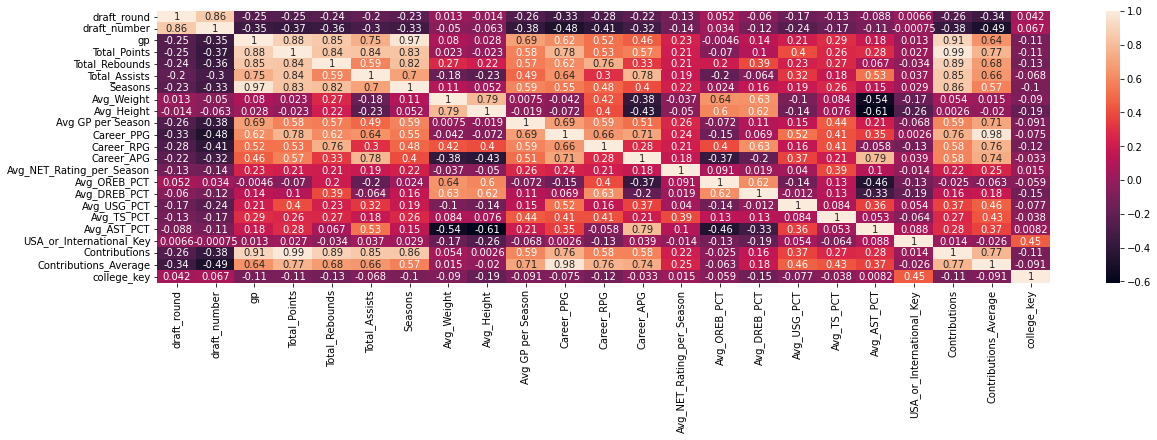

In [29]:
correlation = player_summary_filtered2.corr()
correlation

plt.figure(figsize=(20, 5))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.show()

In [30]:
# Creating a new data frame that summarizes each player's career stats

player_summary_filtered2_2 = pd.DataFrame(player_summary_filtered2.groupby(['USA_or_International'], as_index=False)[('gp','Total_Points','Total_Rebounds','Total_Assists','Seasons')].sum())
player_summary_filtered2_2

,USA_or_International,gp,Total_Points,Total_Rebounds,Total_Assists,Seasons
0,International,87456,863457.4,422525.8,173100.9,1578
1,USA,355272,3741000.3,1478589.2,806228.9,6566


In [31]:
# Calculating Additional Stats

player_summary_filtered2_2['Contributions'] = player_summary_filtered2_2['Total_Points']+player_summary_filtered2_2['Total_Rebounds']+player_summary_filtered2_2['Total_Assists']
player_summary_filtered2_2['Contributions_Average'] = round(player_summary_filtered2_2['Contributions']/player_summary_filtered2_2['gp'],2)
player_summary_filtered2_2['PPG'] = round(player_summary_filtered2_2['Total_Points']/player_summary_filtered2_2['gp'],2)
player_summary_filtered2_2['RPG'] = round(player_summary_filtered2_2['Total_Rebounds']/player_summary_filtered2_2['gp'],2)
player_summary_filtered2_2['APG'] = round(player_summary_filtered2_2['Total_Assists']/player_summary_filtered2_2['gp'],2)
player_summary_filtered2_2['GP_per_Season'] = round(player_summary_filtered2_2['gp']/player_summary_filtered2_2['Seasons'],2)

player_summary_filtered2_2

,USA_or_International,gp,Total_Points,Total_Rebounds,Total_Assists,Seasons,Contributions,Contributions_Average,PPG,RPG,APG,GP_per_Season
0,International,87456,863457.4,422525.8,173100.9,1578,1459084.1,16.68,9.87,4.83,1.98,55.42
1,USA,355272,3741000.3,1478589.2,806228.9,6566,6025818.4,16.96,10.53,4.16,2.27,54.11


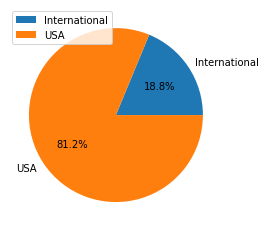

In [32]:
# Creating pie chart of USA vs International

y = player_summary_filtered2_2.Total_Points
mylabels = player_summary_filtered2_2.USA_or_International

plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend()
plt.show()

In [33]:
# Creating a new data frame that summarizes each player's career stats

player_summary_filtered2_3 = pd.DataFrame(player_summary_filtered2.groupby(['college_key'], as_index=False)[('gp','Total_Points','Total_Rebounds','Total_Assists','Seasons')].sum())
player_summary_filtered2_3

,college_key,gp,Total_Points,Total_Rebounds,Total_Assists,Seasons
0,0,84522,924000.6,414858.8,178305.0,1495
1,1,149515,1619982.3,639786.0,353148.2,2676
2,2,208691,2060474.8,846470.2,447876.6,3973


In [34]:
# Calculating Additional Stats

player_summary_filtered2_3['Contributions'] = player_summary_filtered2_3['Total_Points']+player_summary_filtered2_3['Total_Rebounds']+player_summary_filtered2_3['Total_Assists']
player_summary_filtered2_3['Contributions_Average'] = round(player_summary_filtered2_3['Contributions']/player_summary_filtered2_3['gp'],2)
player_summary_filtered2_3['PPG'] = round(player_summary_filtered2_3['Total_Points']/player_summary_filtered2_3['gp'],2)
player_summary_filtered2_3['RPG'] = round(player_summary_filtered2_3['Total_Rebounds']/player_summary_filtered2_3['gp'],2)
player_summary_filtered2_3['APG'] = round(player_summary_filtered2_3['Total_Assists']/player_summary_filtered2_3['gp'],2)
player_summary_filtered2_3['GP_per_Season'] = round(player_summary_filtered2_3['gp']/player_summary_filtered2_3['Seasons'],2)


player_summary_filtered2_3

,college_key,gp,Total_Points,Total_Rebounds,Total_Assists,Seasons,Contributions,Contributions_Average,PPG,RPG,APG,GP_per_Season
0,0,84522,924000.6,414858.8,178305.0,1495,1517164.4,17.95,10.93,4.91,2.11,56.54
1,1,149515,1619982.3,639786.0,353148.2,2676,2612916.5,17.48,10.83,4.28,2.36,55.87
2,2,208691,2060474.8,846470.2,447876.6,3973,3354821.6,16.08,9.87,4.06,2.15,52.53


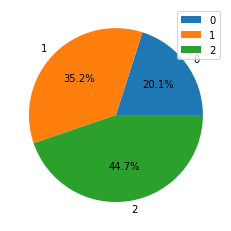

In [35]:
# Creating pie chart of college key

y = player_summary_filtered2_3.Total_Points
mylabels = player_summary_filtered2_3.college_key

plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend()
plt.show()

In [38]:
# Creating a summary of contributions by draft round

player_summary_filtered2_4 = pd.DataFrame(player_summary_filtered2.groupby(['draft_round'], as_index=False)[('gp','Total_Points','Total_Rebounds','Total_Assists','Seasons')].sum())
player_summary_filtered2_4

,draft_round,gp,Total_Points,Total_Rebounds,Total_Assists,Seasons
0,0,604,3072.6,1169.6,1337.1,47
1,1,327246,3697288.5,1501641.9,781989.6,5653
2,2,114878,904096.6,398303.5,196003.1,2444


In [39]:
# Additional stats by draft round

player_summary_filtered2_4['Contributions'] = player_summary_filtered2_4['Total_Points']+player_summary_filtered2_4['Total_Rebounds']+player_summary_filtered2_4['Total_Assists']
player_summary_filtered2_4['Contributions_Average'] = round(player_summary_filtered2_4['Contributions']/player_summary_filtered2_4['gp'],2)
player_summary_filtered2_4['PPG'] = round(player_summary_filtered2_4['Total_Points']/player_summary_filtered2_4['gp'],2)
player_summary_filtered2_4['RPG'] = round(player_summary_filtered2_4['Total_Rebounds']/player_summary_filtered2_4['gp'],2)
player_summary_filtered2_4['APG'] = round(player_summary_filtered2_4['Total_Assists']/player_summary_filtered2_4['gp'],2)
player_summary_filtered2_4['GP_per_Season'] = round(player_summary_filtered2_4['gp']/player_summary_filtered2_4['Seasons'],2)


player_summary_filtered2_4

,draft_round,gp,Total_Points,Total_Rebounds,Total_Assists,Seasons,Contributions,Contributions_Average,PPG,RPG,APG,GP_per_Season
0,0,604,3072.6,1169.6,1337.1,47,5579.3,9.24,5.09,1.94,2.21,12.85
1,1,327246,3697288.5,1501641.9,781989.6,5653,5980920.0,18.28,11.30,4.59,2.39,57.89
2,2,114878,904096.6,398303.5,196003.1,2444,1498403.2,13.04,7.87,3.47,1.71,47.00


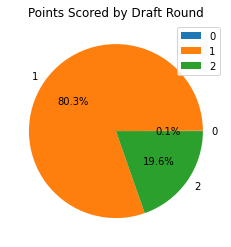

In [40]:
# Creating pie chart of college key

y = player_summary_filtered2_4.Total_Points
mylabels = player_summary_filtered2_4.draft_round

plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend()
plt.title('Points Scored by Draft Round')
plt.show()

In [41]:
# Importing packages for regression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [42]:
# Testing different regression plots to see which variables result in the highest r-squared
# Throwing all variables in at one time

regplot0 = smf.ols('Contributions ~ draft_round + draft_number + Avg_Height + Avg_Weight + USA_or_International_Key + college_key', data=player_summary_filtered2).fit()
print(regplot0.summary())

# Not a great r-squared

                            OLS Regression Results                            
Dep. Variable:          Contributions   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     53.09
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           3.03e-59
Time:                        11:02:37   Log-Likelihood:                -14685.
No. Observations:                1439   AIC:                         2.938e+04
Df Residuals:                    1432   BIC:                         2.942e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [43]:
# Testing different regression plots to see which variables result in the highest r-squared
# Throwing all variables in at one time
# Going to look at contributions average vs contributions as that could be skewed by games played

regplot1 = smf.ols('Contributions_Average ~ draft_round + draft_number + Avg_Height + Avg_Weight + USA_or_International_Key + college_key', data=player_summary_filtered2).fit()
print(regplot1.summary())

# r squared gets a little bit better

                              OLS Regression Results                             
Dep. Variable:     Contributions_Average   R-squared:                       0.279
Model:                               OLS   Adj. R-squared:                  0.276
Method:                    Least Squares   F-statistic:                     92.34
Date:                   Fri, 21 Oct 2022   Prob (F-statistic):           4.00e-98
Time:                           11:02:37   Log-Likelihood:                -4739.8
No. Observations:                   1439   AIC:                             9494.
Df Residuals:                       1432   BIC:                             9530.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [44]:
# Think there might be some collinearity between fields, so testing that out
# Testing player height vs weight

regplot2 = smf.ols('Avg_Height ~ Avg_Weight', data=player_summary_filtered2).fit()
print(regplot2.summary())

# Showing a decent correlation

                            OLS Regression Results                            
Dep. Variable:             Avg_Height   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     2419.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):          2.60e-310
Time:                        11:02:37   Log-Likelihood:                -4531.8
No. Observations:                1439   AIC:                             9068.
Df Residuals:                    1437   BIC:                             9078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    140.1507      1.241    112.933      0.0

In [45]:
# Testing draft round and draft number here

regplot3 = smf.ols('draft_round ~ draft_number', data=player_summary_filtered2).fit()
print(regplot3.summary())

# Showing a decent correlation

                            OLS Regression Results                            
Dep. Variable:            draft_round   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     4021.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:02:38   Log-Likelihood:                -182.69
No. Observations:                1439   AIC:                             369.4
Df Residuals:                    1437   BIC:                             379.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6571      0.014     48.138   

In [46]:
# Both height and weight are not needed due to collinearity
# Both draft round and draft number are not needed due to collinearity

regplot4 = smf.ols('Contributions_Average ~ draft_number + Avg_Height + USA_or_International_Key + college_key', data=player_summary_filtered2).fit()
print(regplot4.summary())

# r-squared went down again from regplot1

                              OLS Regression Results                             
Dep. Variable:     Contributions_Average   R-squared:                       0.250
Model:                               OLS   Adj. R-squared:                  0.248
Method:                    Least Squares   F-statistic:                     119.4
Date:                   Fri, 21 Oct 2022   Prob (F-statistic):           5.11e-88
Time:                           11:02:39   Log-Likelihood:                -4768.2
No. Observations:                   1439   AIC:                             9546.
Df Residuals:                       1434   BIC:                             9573.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [47]:
regplot5 = smf.ols('Contributions_Average ~ draft_number + Avg_Height + college_key', data=player_summary_filtered2).fit()
print(regplot5.summary())

                              OLS Regression Results                             
Dep. Variable:     Contributions_Average   R-squared:                       0.250
Model:                               OLS   Adj. R-squared:                  0.248
Method:                    Least Squares   F-statistic:                     159.2
Date:                   Fri, 21 Oct 2022   Prob (F-statistic):           4.44e-89
Time:                           11:02:40   Log-Likelihood:                -4768.4
No. Observations:                   1439   AIC:                             9545.
Df Residuals:                       1435   BIC:                             9566.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       29

In [48]:
# Separating data into test and train datasets

x = player_summary_filtered2[['draft_number', 'Avg_Height', 'college_key']]
y = player_summary_filtered2[['Contributions_Average']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=0)

print('Test Data Values for Testing: ', x_test.shape[0])
print('Test Data Values for Training: ', x_train.shape[0])

Test Data Values for Testing:  360
Test Data Values for Training:  1079


In [49]:
# Evaluating test data

lre = LinearRegression()
lre.fit(x_train, y_train)

print('The R-squared for the test data is:', lre.score(x_test, y_test))

# R-squared is quite poor and should not use this model

The R-squared for the test data is: 0.19923039179644775


In [ ]:
# Additional Visualizations

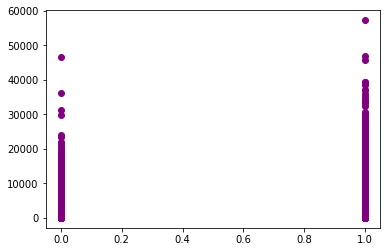

In [41]:
plt.scatter(player_summary_filtered2.USA_or_International_Key, player_summary_filtered2.Contributions, color="purple")

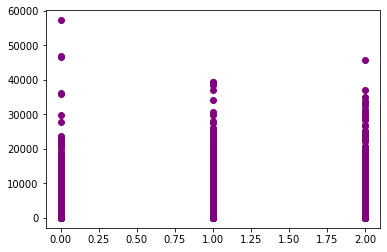

In [42]:
plt.scatter(player_summary_filtered2.college_key, player_summary_filtered2.Contributions, color="purple")

<BarContainer object of 1439 artists>

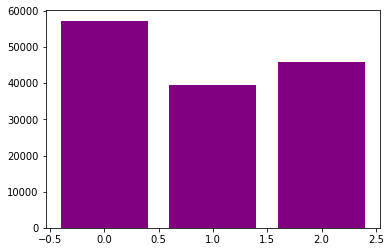

In [68]:
plt.bar(player_summary_filtered2.college_key, player_summary_filtered2.Contributions, color="purple")

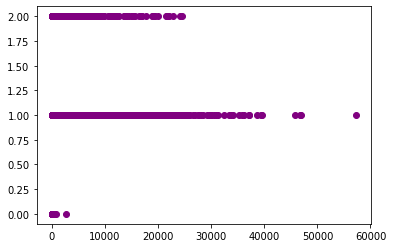

In [66]:
plt.scatter(player_summary_filtered2.Contributions, player_summary_filtered2.draft_round, color="purple")

In [ ]:
## Work for answering questions for Final Project 2

In [35]:
# Seeing number of International players compared to USA players

international_count = player_summary_filtered2.groupby(['USA_or_International'])['player_name'].count()
international_count

USA_or_International
International     292
USA              1147
Name: player_name, dtype: int64

In [69]:
# Seeing how international players have grown over time

data['USA_or_International'] = data['country']
data['USA_or_International'] = data.USA_or_International.apply(usa_or_international)


data_filter = data[data['USA_or_International'] == 'International']
data_filter


international_season = pd.DataFrame(data_filter.groupby(['season'])['player_name'].count())

international_season['season_start'] = international_season.index.astype(str).str[:4]
international_season

,player_name,season_start
season,,
1996-97,9,1996
1997-98,13,1997
1998-99,21,1998
1999-00,23,1999
2000-01,37,2000
2001-02,47,2001
2002-03,59,2002
2003-04,57,2003
2004-05,69,2004


Text(0.5, 1.0, 'International Player Growth Over the Years')

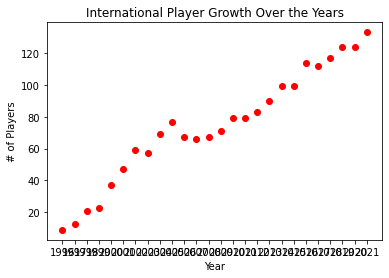

In [71]:
# Plotting international player growth over time

plt.scatter(international_season.season_start,international_season.player_name, c='red')
plt.xlabel('Year')
plt.ylabel('# of Players')
plt.title("International Player Growth Over the Years")

In [77]:
# Viewing points by season over time

points_over_time = pd.DataFrame(data.groupby(['season'])['Total_Points'].sum())

points_over_time['season_start'] = points_over_time.index.astype(str).str[:4]

points_over_time

,Total_Points,season_start
season,,
1996-97,230404.9,1996
1997-98,227252.4,1997
1998-99,132847.4,1998
1999-00,231768.2,1999
2000-01,225511.7,2000
2001-02,227036.8,2001
2002-03,226192.3,2002
2003-04,222167.1,2003
2004-05,239143.1,2004


Text(0.5, 1.0, 'Points Scored Over the Years')

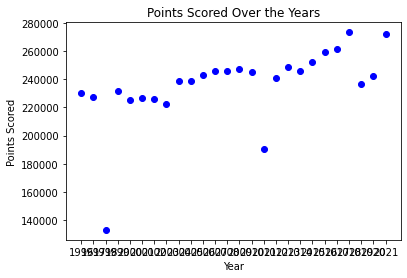

In [80]:
# Plotting points scored over time

plt.scatter(points_over_time.season_start,points_over_time.Total_Points, c='blue')
plt.xlabel('Year')
plt.ylabel('Points Scored')
plt.title("Points Scored Over the Years")

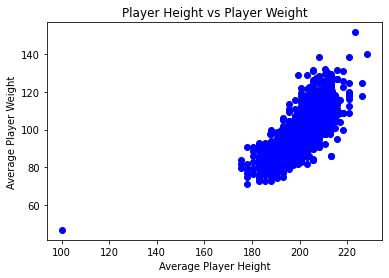

In [56]:
plt.scatter(player_summary_filtered2.Avg_Height, player_summary_filtered2.Avg_Weight, c='blue')
plt.xlabel("Average Player Height")
plt.ylabel("Average Player Weight")
plt.title("Player Height vs Player Weight")

plt.show()

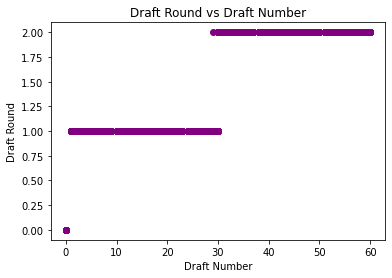

In [47]:
# Making sure draft number falls where it is expected
# If 0, that means undrafted, so the draft round and number will both be 0
# If 1, that means the first round, draft numbers 1-30
# If 2, that means the second round, draft numbers 31-60

plt.scatter(player_summary_filtered2.draft_number, player_summary_filtered2.draft_round, c="purple")
plt.xlabel("Draft Number")
plt.ylabel("Draft Round")
plt.title("Draft Round vs Draft Number")
plt.show()

In [52]:
# Creating a summary by college view

college_summary = pd.DataFrame(player_summary_filtered2.groupby(['college'], as_index=False)[('gp','Total_Points','Total_Rebounds','Total_Assists','Seasons', 'Contributions')].sum())
college_summary

,college,gp,Total_Points,Total_Rebounds,Total_Assists,Seasons,Contributions
0,,287,2880.5,1735.5,384.5,4,5000.5
1,,4,35.2,14.0,1.2,1,50.4
2,Alabama,2367,28083.0,9078.8,7039.9,42,44201.7
3,Alabama Huntsville,8,12.0,6.4,4.8,1,23.2
4,Alabama-Birmingham,8,8.0,3.2,0.0,1,11.2
...,...,...,...,...,...,...,...
218,Wright State,610,4000.7,2713.7,424.2,11,7138.6
219,Wyoming,468,3441.3,2637.8,786.3,9,6865.4
220,Xavier,2581,26762.7,12133.6,4977.7,45,43874.0
221,Yale,80,142.4,109.8,35.8,3,288.0


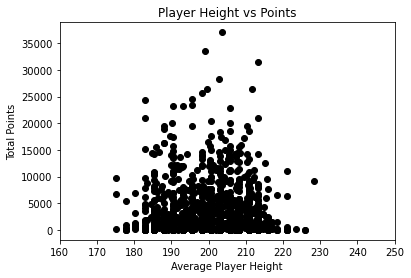

In [58]:
# Scatter plot of height vs points to see if there is any correlation

plt.scatter(player_summary_filtered2.Avg_Height, player_summary_filtered2.Total_Points, c='black')
plt.xlabel("Average Player Height")
plt.ylabel("Total Points")
plt.title("Player Height vs Points")

min_x_data_value = 160
max_x_data_value = 250
plt.xlim(min_x_data_value,max_x_data_value)

plt.show()

In [50]:
player_summary_filtered2.to_excel(r'U:\Desktop\NBA_Player_Summary.xlsx', sheet_name = 'Data', index = False)

In [55]:
data.to_excel(r'U:\Desktop\NBA_college_Summary.xlsx', sheet_name = 'Data', index = False)